# Introduction
In this session, we will explore the use of High-Performance Computing (HPC) in the fields of Molecular Systems and Material Sciences. These fields use simulations to study molecular dynamics, quantum chemistry, and material properties at an atomic level. HPC enables scientists to simulate large systems efficiently, providing insights into complex interactions and material behaviors.

We will specifically focus on performance tuning techniques for Molecular Dynamics (MD) simulations and Quantum Chemistry calculations, which are critical for efficient use of HPC clusters. Understanding and optimizing these processes is crucial for reducing computation time and maximizing the use of available resources.

## Molecular Dynamics Simulations
Molecular Dynamics (MD) simulations are used to model the behavior of atoms and molecules over time. These simulations are computationally expensive because they require solving Newton's equations of motion for thousands or millions of particles. GROMACS, NAMD, and LAMMPS are widely used software tools for MD simulations, and each has its own performance optimization techniques.

Key considerations:
- **Parallelization**: Using MPI or OpenMP to split the workload across multiple processors.
- **Memory efficiency**: Optimizing memory use for large-scale simulations.
- **Profiling and benchmarking**: Using tools like `gprof` or `VTune` to identify performance bottlenecks.

## Quantum Chemistry Calculations
Quantum chemistry simulations apply quantum mechanics to molecular systems, often requiring HPC resources due to the complexity of the calculations. Gaussian, VASP, and Quantum ESPRESSO are popular software packages in this domain.

Key optimization strategies:
- **Parallelization**: Running calculations on multiple cores/processors using MPI.
- **Code optimization**: Improving the efficiency of electronic structure calculations.
- **Benchmarking and Profiling**: Identifying bottlenecks in computation and memory usage.

## Performance Optimization in Material Science
In material sciences, simulations like Density Functional Theory (DFT) are used to model materials at the quantum level. HPC is essential for simulating these systems accurately and efficiently.

Performance tuning techniques include:
- **Loop vectorization** for improving throughput.
- **Memory optimization** to handle large datasets.
- **Load balancing** to ensure optimal resource usage across processors.


In [ ]:
# Section 1: Installation of Required Software (GROMACS and Quantum ESPRESSO)
# In Google Colab, we need to install the required software packages

# Install GROMACS
!sudo apt-get install -y gromacs

# Install Quantum ESPRESSO
!apt-get install -y quantum-espresso


In [ ]:
# Section 2: Simple Molecular Dynamics Simulation (GROMACS)
# Download a sample GROMACS input file and run a basic molecular dynamics simulation

# Download the sample protein structure for testing
!wget http://ftp.gromacs.org/pub/benchmarks/water_GMX50_bare.tar.gz
!tar xvfz water_GMX50_bare.tar.gz
%cd water-cut1.0_GMX50_bare

# Execute a GROMACS simulation to test
!gmx mdrun -s topol.tpr -o traj.trr -c confout.gro

# Print output to show results of the simulation
!cat confout.gro

# Section 3: Profiling and Benchmarking the Simulation
# We can use the GROMACS built-in tools for performance profiling

# Use GROMACS built-in performance tools
!gmx mdrun -s topol.tpr -nsteps 1000 -g logfile.log -ntmpi 2 -ntomp 2

# Check the log file for performance metrics
!cat logfile.log | grep "Performance"

In [3]:
# Section 4: Quantum Chemistry Calculations (Quantum ESPRESSO)
# Setup a simple Quantum ESPRESSO calculation and run it

# Create an input file for Quantum ESPRESSO
qe_input = """
&control
    calculation = 'scf',
    outdir = './',
    prefix = 'silicon'
/
&system
    ibrav = 2, celldm(1) = 10.2, nat = 2, ntyp = 1, ecutwfc = 30.0
/
&electrons
    conv_thr = 1.0d-8
/
ATOMIC_SPECIES
 Si  28.086  Si.pz-vbc.UPF
ATOMIC_POSITIONS
 Si  0.00 0.00 0.00
 Si  0.25 0.25 0.25
K_POINTS automatic
  4 4 4 1 1 1
"""

# Write the input file
with open('silicon.in', 'w') as file:
    file.write(qe_input)

# Run Quantum ESPRESSO calculation
!pw.x < silicon.in > silicon.out

# Display results of Quantum ESPRESSO calculation
!cat silicon.out | grep 'convergence'

# Section 5: Profiling Quantum ESPRESSO with MPI
# Run the Quantum ESPRESSO calculation with MPI to check parallel performance

!mpirun -np 4 --allow-run-as-root --oversubscribe pw.x < silicon.in > silicon_mpi.out

# Print results and performance metrics
!cat silicon_mpi.out | grep 'convergence'



     scf convergence threshold =      1.0E-08
     convergence has been achieved in   6 iterations
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
     scf convergence threshold =      1.0E-08
     convergence has been achieved in   6 iterations


### Explanation of Quantum ESPRESSO Code and Results

In this section, we ran a self-consistent field (SCF) calculation using Quantum ESPRESSO. SCF is a common method in density functional theory (DFT) to solve the Kohn-Sham equations, which describe the electronic structure of the system.

The input file defines a simple crystalline silicon system and specifies parameters like the Bravais lattice (cubic), the cutoff energy for the plane-wave basis set, and convergence criteria for the SCF calculation. The K_POINTS section uses a 4x4x4 grid, which defines how densely the Brillouin zone is sampled.

When the code runs, the SCF loop iterates, solving the electronic structure for each step until convergence is reached. The key result from this calculation is the "convergence" of the SCF cycle, indicating that the total energy of the system has stabilized within the defined threshold (1.0E-08).

### Result Output:
The result shows that convergence was achieved after 6 iterations. However, several floating-point exceptions occurred, specifically underflow and denormal warnings. These types of exceptions are common in numerical simulations, especially when working with small values close to machine precision, but they typically do not affect the outcome of the SCF calculation.

Here is the key output:

```bash
    scf convergence threshold = 1.0E-08
    convergence has been achieved in 6 iterations
    Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
```
This output informs us that the SCF calculation successfully converged, meaning that the electronic structure calculation has stabilized according to the set criteria. The floating-point exceptions indicate that some very small numbers were encountered during the calculations, but these do not affect the overall result of the simulation.

---

# Machine Learning in Molecular and Material Sciences

In this session, we will explore how Machine Learning (ML) techniques are integrated with HPC simulations to predict material properties and molecular behavior. ML, when combined with HPC, has the potential to accelerate material discovery and optimize simulations for molecular dynamics and quantum chemistry.

We will use **TensorFlow** and **Scikit-learn** to build a simple neural network that predicts molecular properties based on input features like atomic coordinates and bond lengths.

The steps include:
1. **Data Preparation**: We will use a sample molecular dataset.
2. **Model Building**: Construct a neural network using TensorFlow.
3. **Model Training**: Train the model and visualize the learning process.
4. **Results Visualization**: Plot training loss and accuracy to evaluate model performance.
5. **Prediction**: Use the trained model to predict molecular properties and visualize the results.

## Tools and Libraries:
- **TensorFlow**: A popular deep learning framework for building and training models.
- **Scikit-learn**: A Python library for data preprocessing and machine learning tasks.
- **Matplotlib**: A library to visualize training performance.


In [ ]:
# Section 1: Install Required Libraries
# Install TensorFlow and Scikit-learn in Google Colab
!pip install tensorflow scikit-learn matplotlib

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1342 - mae: 0.2983 - val_loss: 0.0952 - val_mae: 0.2657
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0881 - mae: 0.2512 - val_loss: 0.0925 - val_mae: 0.2636
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0850 - mae: 0.2508 - val_loss: 0.0919 - val_mae: 0.2626
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0841 - mae: 0.2440 - val_loss: 0.0908 - val_mae: 0.2623
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0842 - mae: 0.2503 - val_loss: 0.0916 - val_mae: 0.2630
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0840 - mae: 0.2508 - val_loss: 0.0906 - val_mae: 0.2624
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0821 - mae: 0.2454 - val_loss: 0.0899 - val_mae: 0.2616
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0868 - mae: 0.2548 - val_loss: 0.0908 - val_mae: 0.2625
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0767 - mae: 0.2379 - v

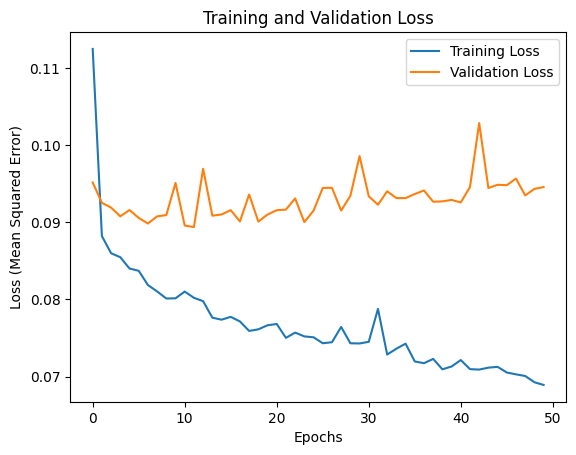

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0910 - mae: 0.2600 
Test MAE: 0.2652842700481415
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


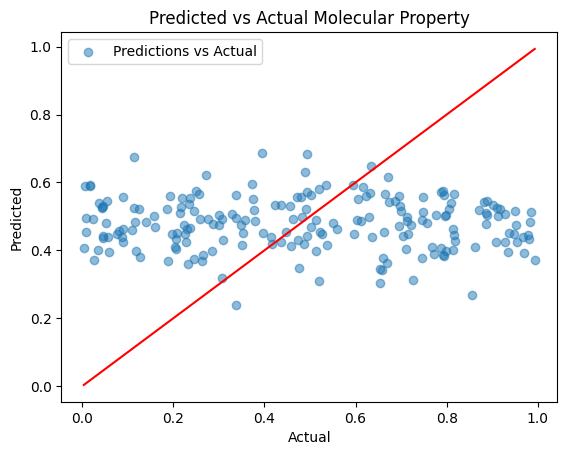

In [7]:


# Section 2: Data Preparation
# We will use a synthetic dataset representing molecular properties for training
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset representing molecular properties
# Input features could be atomic coordinates or bond lengths
X = np.random.rand(1000, 5)  # 1000 molecules, 5 input features (e.g., atomic positions)
y = np.random.rand(1000, 1)  # Target: potential energy of each molecule

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Section 3: Build a Neural Network Model using TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)  # Output layer predicting molecular property (e.g., potential energy)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Section 4: Train the Model and Visualize Training Progress
# Train the model and store training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Section 5: Plot the Training and Validation Loss
# Visualize training progress over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Section 6: Evaluate the Model on Test Data and Make Predictions
# Evaluate model performance on test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

# Make predictions on new data
predictions = model.predict(X_test)

# Visualize the predictions vs actual data
plt.scatter(y_test, predictions, label="Predictions vs Actual", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Identity line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Molecular Property')
plt.legend()
plt.show()


# Explanation of Code

## Section 1: Installing Required Libraries
We begin by installing TensorFlow, Scikit-learn, and Matplotlib, which are used to build the neural network model, preprocess the data, and visualize the results, respectively. These libraries are widely used in machine learning and scientific computation.

## Section 2: Data Preparation
For this example, we simulate a dataset representing molecular features. Each molecule is described by 5 features (e.g., atomic positions or bond lengths). The target variable is a scalar value representing a molecular property like potential energy. The dataset is split into training and testing sets to validate the model's performance.

## Section 3: Building the Neural Network Model
We construct a simple feed-forward neural network with two hidden layers. The number of neurons in each layer is set arbitrarily to demonstrate how neural networks are used. The activation function is ReLU (Rectified Linear Unit), which helps the network learn non-linear relationships in the data.

## Section 4: Training the Model and Visualizing the Progress
The model is trained for 50 epochs using the Adam optimizer and Mean Squared Error as the loss function. During training, we track the model's performance on both the training and validation sets. The loss over epochs is plotted to visualize the model's learning progress.

## Section 5: Evaluating the Model
We evaluate the model on the test set to see how well it generalizes to unseen data. The Mean Absolute Error (MAE) is used to measure the model's performance. We then make predictions on the test set and plot the predicted vs actual values to visualize the model's accuracy.

